In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

import re
pd.set_option('display.max_colwidth', None)
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

[nltk_data] Downloading package stopwords to /Users/nofar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nofar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/nofar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('pos_and_neg_tweets.csv')
df.sample(5)

Unnamed: 0  Unnamed: 0.1                   id        user_name  \
7624        7624           288  1351559874350485505     RohitKuhar10   
7990        7990           654  1350694822424825856  KATMORR98568982   
4981        4981          1645  1352561433410744320        yelli1972   
8403        8403          1067  1351478331233902594  monikasheokand5   
3799        3799           463  1351301843935059968           ZeevBA   

       user_location  \
7624             NaN   
7990  Texas City, TX   
4981        Fn Cold    
8403         Haryana   
3799             NaN   

                                                                                                                                                       user_description  \
7624  #WE_STAND_WITH_FARMERS.Free Kissan IT cell sewa.\n2014 me modi ko vote diya tha bus us galti ka paschataap karne ke liye hi Twitter join krna pda.Jai bhole nath.   
7990   love people. animals more. fishing. any ocean! I always fight for the underdog! grandma! RESISTOR! FBR BLM! survivor! stronger together! giver not taker! fierce   
4981                                                   #FuckCancer In my 7th fight against cancer😷 #prochoice #LGBTQally🌈 @Eagles #Breonna #ASL #disabled #wearafnmask😷   
8403          कभी सोचा है एक किसान के बगैर जिंदिगी क्या होगी..\nध्यान रहे की शरीर अत्याचार तो बर्दास्त कर सकता है,\nलेकिन पेट की भूख नहीं ..!!\n– हर किसान को सम्मान दे   
3799                                                                Democracy is not only the right to be equal, but the equal right to be different. \r\nShimon Peres.   

             user_created  user_followers                 date  \
7624  2020-12-09 17:07:00             163  2021-01-19 15:59:19   
7990  2021-01-13 04:14:58             746  2021-01-17 06:41:55   
4981  2010-03-23 17:51:21            3906  2021-01-22 10:19:09   
8403  2019-07-08 19:21:56            1043  2021-01-19 10:35:18   
3799  2011-07-03 19:12:28            1361  2021-01-18 22:54:00   

                                                                                                                                                text  \
7624    RT @khapofficial: 580 adverse events following immunisation (AEFI) were recorded in India, three days after the coronavirus vaccination dri…   
7990    RT @alandrummond2: I am 66 years old. I have heart disease. I am still working in the ER. I am seeing patients with Covid. I am at higher r…   
4981                                                                         @atrupar Fox measures time in their own way... and reality! #fakenews 🙄   
8403   RT @khapofficial: Customer is God for doctors, pharma companies, corporates and govt. So, \nPay to Farmers not pharmacy \nFamily Farmers not…   
3799  #antivaxxers are happy in the Netherlands\n\nWhere the vaccination program completely failed, due to the inability of… https://t.co/vKhcLS0no5   

      favorites  retweets  is_retweet  category  
7624          0         2        True  Negative  
7990          0      4549        True  Negative  
4981          0         0       False  Negative  
8403          0         5        True  Negative  
3799          1         1        True  Negative

In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9505 entries, 0 to 9504
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9505 non-null   int64 
 1   Unnamed: 0.1      9505 non-null   int64 
 2   id                9505 non-null   int64 
 3   user_name         9505 non-null   object
 4   user_location     6839 non-null   object
 5   user_description  8481 non-null   object
 6   user_created      9505 non-null   object
 7   user_followers    9505 non-null   int64 
 8   date              9505 non-null   object
 9   text              9505 non-null   object
 10  favorites         9505 non-null   int64 
 11  retweets          9505 non-null   int64 
 12  is_retweet        9505 non-null   bool  
 13  category          9505 non-null   object
dtypes: bool(1), int64(6), object(7)
memory usage: 974.8+ KB


((9505, 14), None)

In [4]:
df.describe(include='all')

Unnamed: 0  Unnamed: 0.1            id       user_name  \
count   9505.000000   9505.000000  9.505000e+03            9505   
unique          NaN           NaN           NaN            4785   
top             NaN           NaN           NaN  physicianswkly   
freq            NaN           NaN           NaN             170   
mean    4752.000000    849.129511  1.351929e+18             NaN   
std     2744.001488    542.717729  8.061717e+14             NaN   
min        0.000000      0.000000  1.349766e+18             NaN   
25%     2376.000000    396.000000  1.351368e+18             NaN   
50%     4752.000000    792.000000  1.352389e+18             NaN   
75%     7128.000000   1239.000000  1.352554e+18             NaN   
max     9504.000000   1999.000000  1.352669e+18             NaN   

        user_location  \
count            6839   
unique           2076   
top     United States   
freq              294   
mean              NaN   
std               NaN   
min               NaN   
25%               NaN   
50%               NaN   
75%               NaN   
max               NaN   

                                                                                                                                                     user_description  \
count                                                                                                                                                            8481   
unique                                                                                                                                                           4120   
top     Physician’s Weekly provides HCP-driven & -written editorial, CME & news to HCPs in top US hospitals, medical centers & private practices via print & digital.   
freq                                                                                                                                                              170   
mean                                                                                                                                                              NaN   
std                                                                                                                                                               NaN   
min                                                                                                                                                               NaN   
25%                                                                                                                                                               NaN   
50%                                                                                                                                                               NaN   
75%                                                                                                                                                               NaN   
max                                                                                                                                                               NaN   

               user_created  user_followers                 date  \
count                  9505    9.505000e+03                 9505   
unique                 4785             NaN                 6175   
top     2010-06-14 13:27:59             NaN  2021-01-22 10:55:00   
freq                    170             NaN                    6   
mean                    NaN    4.977029e+03                  NaN   
std                     NaN    2.766313e+04                  NaN   
min                     NaN    0.000000e+00                  NaN   
25%                     NaN    1.310000e+02                  NaN   
50%                     NaN    5.670000e+02                  NaN   
75%                     NaN    2.098000e+03                  NaN   
max                     NaN    1.031351e+06                  NaN   

                                                         

Taking care of Nas

In [5]:
print(f'Dataset dimensions: {df.shape}')
print(f'Dataset has NAs?: {df.isna().any().any()}, so the number of Nas is: {df.isna().sum().sum()}')
print(f'Dataset data types:\n{df.dtypes.value_counts()}')

Dataset dimensions: (9505, 14)
Dataset has NAs?: True, so the number of Nas is: 3690
Dataset data types:
object    7
int64     6
bool      1
dtype: int64


In [6]:
df.isna().sum()

Unnamed: 0             0
Unnamed: 0.1           0
id                     0
user_name              0
user_location       2666
user_description    1024
user_created           0
user_followers         0
date                   0
text                   0
favorites              0
retweets               0
is_retweet             0
category               0
dtype: int64

In [7]:
df.user_location.fillna('Unknown', inplace=True)

In [8]:
print(f'Dataset has NAs?: {df.isna().any().any()}, so the number of Nas is: {df.isna().sum().sum()}')
print('all are from user_description feature')

Dataset has NAs?: True, so the number of Nas is: 1024
all are from user_description feature


In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'user_name', 'user_location',
       'user_description', 'user_created', 'user_followers', 'date', 'text',
       'favorites', 'retweets', 'is_retweet', 'category'],
      dtype='object')

drop unrelavent columns:

In [10]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'user_description', 'favorites'], axis=1, inplace=True)
df.sample(2)

id       user_name      user_location  \
1990  1352382969311354881  physicianswkly  Basking Ridge, NJ   
9482  1350737157586087936   RedRocketSoft            Unknown   

             user_created  user_followers                 date  \
1990  2010-06-14 13:27:59            6002  2021-01-21 22:30:00   
9482  2010-08-04 21:00:59               2  2021-01-17 09:30:08   

                                                                                                                                              text  \
1990     !!!!!!! 1-HOUR WARNING !!!!!!\n\nJoin us, #ThisIsOurShot campaign co-founder @AlexMMTri &amp; PW Editor-in-Chief… https://t.co/BWwfCeRfou   
9482  DO NOT BOOK WITH OPODO - Your daily reminder that @opodo are shameless scam merchants that charge 20% to refund you… https://t.co/rCMZtEWDsA   

      retweets  is_retweet  category  
1990         0       False  Positive  
9482         3        True  Negative

* date column:

In [11]:
df['date'] = df['date'].apply(lambda x: x.split('+')[0])
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

* checking the target column:

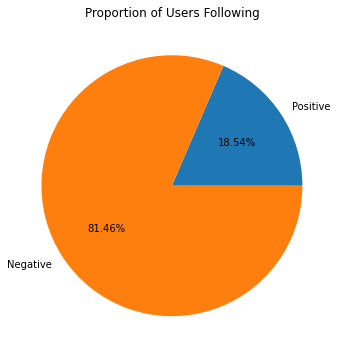

In [12]:
total_positive_followers = df[df['category']=='Positive']\
                                  .sort_values('user_followers', ascending=False)\
                                  .drop_duplicates(subset=['user_name']).user_followers.sum()

total_negative_followers = df[df['category']=='Negative']\
                              .sort_values('user_followers', ascending=False)\
                              .drop_duplicates(subset=['user_name']).user_followers.sum()

total_followers = total_positive_followers + total_negative_followers

verified_labels = ['Positive', 'Negative']

verified_count = [total_positive_followers / total_followers * 100, 
                  total_negative_followers / total_followers * 100]

plt.figure(figsize=(6,6))
plt.title("Proportion of Users Following")
plt.pie(verified_count, labels = verified_labels,autopct='%1.2f%%')
plt.show()

(The Data is *NOT* balanced)

* cleaning text column

In [13]:
df["up_text"] = df.text.str.lower()
#Remove twitter handlers
df.up_text = df.up_text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df.up_text = df.up_text.apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
df.up_text = df.up_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
df.up_text = df.up_text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
df.up_text = df.up_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
df.up_text = df.up_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [14]:
df['hashtags'] =  df.text.str.lower()
df.hashtags = df.hashtags.apply(lambda x:re.sub('@[^\s]+','',x)) 
df.hashtags = df.hashtags.apply(lambda x:re.sub(r"http\S+", "", x))
df.hashtags = df.hashtags.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df.hashtags = df.hashtags.apply(lambda x: x if '#' in x else '')
df.hashtags = df.hashtags.apply(lambda x: [i for i in x.split() if i.startswith('#')])

    - expand contractions:

In [15]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not ","'s":" is ","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['up_text']=df['up_text'].apply(lambda x:expand_contractions(x))

In [16]:
for index,text in enumerate(df['up_text'][35:40]):
    print('tweet %d:\n'%(index+1),text)

tweet 1:
 rt you re telling me bill gates is tracking himself
tweet 2:
 you re telling me bill gates is tracking himself
tweet 3:
 the crestwood team is doing their part to keep patients safe
tweet 4:
 rt my darling mum amp dad went out for first time in forever 2day to get their first jabs stilllong road ahead but a
tweet 5:
 moderna vaccine completed so grateful for the opportunity to get the vaccine amp thankful to all those who have


* create tokenized column with no stop words:

In [17]:
df['tokenized'] = df['up_text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

In [18]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
df['tokenized'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

In [19]:
wnl = WordNetLemmatizer()
df['tokenized'] = df['tokenized'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

In [20]:
df.tokenized

0                                                          [onhappy, notescheduled, first, vaccine, dose]
1                                                                                                      []
2               [take, 93yo, mum, jab, today, brilliantly, organise, wait, fuss, side, effect, 2, 000, j]
3                                                                     [1st, dose, donhesitate, vaccinate]
4       [rt, myth, covid, 19, vaccine, enters, cell, change, dna, fact, messenger, rna, two, first, type]
                                                      ...                                                
9500                                 [rt, shut, business, state, therenothing, slow, support, free, drug]
9501                                                 [rt, er, doctor, want, vaccine, front, line, worker]
9502                                 [rt, shut, business, state, therenothing, slow, support, free, drug]
9503                                 [rt, shut

### Visualization: 100 top 

#### top 100 words

In [21]:
words = df['tokenized']
allwords = []
for wordlist in words:
    allwords += wordlist
allwords = [word for word in allwords if word !='amp']

In [22]:
words_neg = df.loc[df['category']=='Negative','tokenized']
allwords_neg = []
for wordlist in words_neg:
    allwords_neg += wordlist
allwords_neg = [word for word in allwords_neg if word !='amp']

words_pos = df[df['category']=='Positive']['tokenized']
allwords_pos = []
for wordlist in words_pos:
    allwords_pos += wordlist
words_pos = [word for word in words_pos if word !='amp']

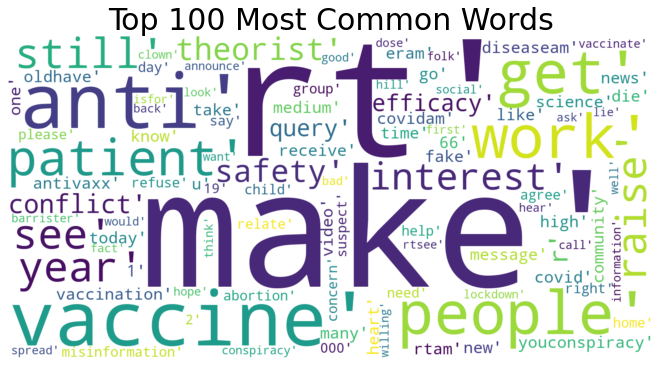

In [23]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(9,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

#### top 100 hashtags

In [24]:
hasht = df['hashtags']
hashtags = []
for wordlist in hasht:
    hashtags += wordlist

hash_neg = df[df['category']=='Negative']['hashtags']
hashtags_neg = []
for wordlist in hash_neg:
    hashtags_neg += wordlist

hash_pos = df[df['category']=='Positive']['hashtags']
hashtags_pos = []
for wordlist in hash_pos:
    hashtags_pos += wordlist

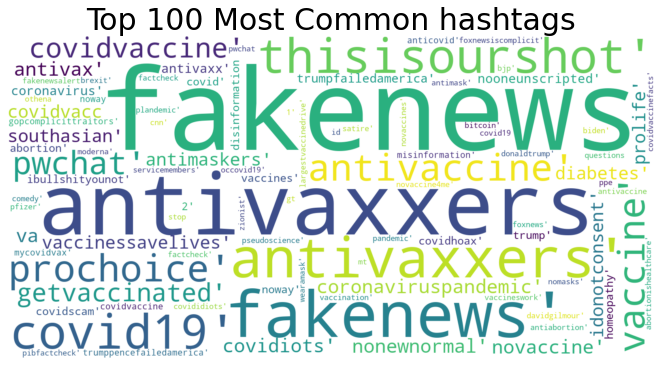

In [25]:
mostcommon = FreqDist(hashtags).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(9,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common hashtags', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

#### - negative hashtags:

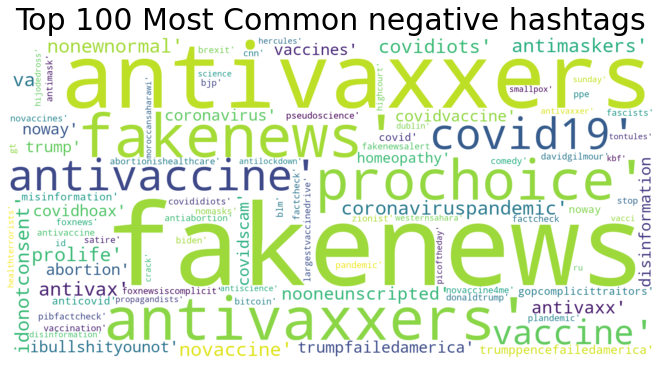

In [26]:
mostcommon = FreqDist(hashtags_neg).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(10,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common negative hashtags', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

#### - positive hashtags:

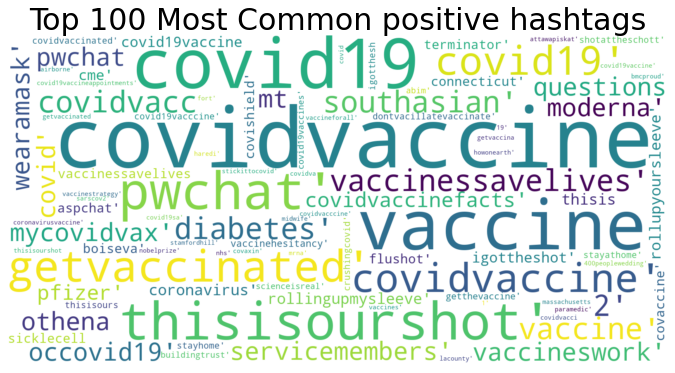

In [27]:
mostcommon = FreqDist(hashtags_pos).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = plt.figure(figsize=(10,7), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common positive hashtags', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

### most common words (text):

In [28]:
com_words, times = zip(*FreqDist(allwords).most_common(50))
mini_df = pd.DataFrame(data={'Common Words':com_words, 'count':times})
fig = px.treemap(mini_df, path=['Common Words'], values='count',title='50 Most Common Words In Tweets')
fig.show()

In [29]:
com_neg, ntimes = zip(*FreqDist(allwords_neg).most_common(50))
mini_n = pd.DataFrame(data={'Common Negative Words':com_neg, 'count':ntimes})
fig = px.treemap(mini_n, path=['Common Negative Words'], values='count',title='50 Most Common Negative Words In Tweets')
fig.show()

In [30]:
com_pos, ptimes = zip(*FreqDist(allwords_pos).most_common(50))
mini_p = pd.DataFrame(data={'Common Positive Words':com_pos, 'count':ptimes})
fig = px.treemap(mini_p, path=['Common Positive Words'], values='count',title='50 Most Common Positive Words In Tweets')
fig.show()

### Taking care of location:

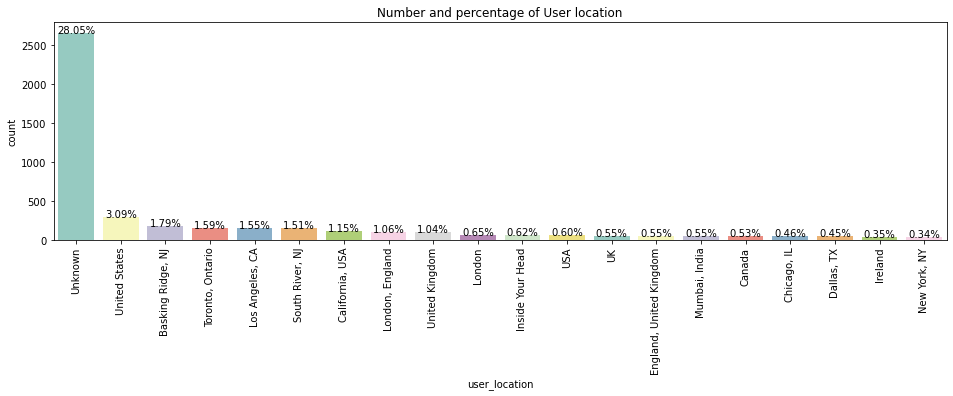

In [31]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature])
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=10)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

plot_count("user_location", "User location", df,4)

In [32]:
c_df = pd.read_csv('wikipedia-iso-country-codes.csv')
c_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
df['country'] = df['user_location']

In [33]:
df = df.merge(c_df, on="country")
df.head(3)

id     user_name   user_location         user_created  \
0  1352626551720996866   elysiumcare  United Kingdom  2016-10-28 09:34:11   
1  1352604084222750721  ejazkhushnud  United Kingdom  2014-08-19 20:52:01   
2  1352567647423107076        MRRS71  United Kingdom  2017-06-09 20:49:13   

   user_followers                date  \
0            1525 2021-01-22 14:37:55   
1             795 2021-01-22 13:08:38   
2             811 2021-01-22 10:43:51   

                                                                                                                                               text  \
0  RT @Donna_Arya: So grateful to have had my first dose of #CovidVaccine. Thank you to everyone at the centre in Wokingham &amp; to @elysiumcare.…   
1    RT @AliRacaniere: My Ammi Jaan: 77yr #SouthAsian #diabetes\n\nReceived WhatsApp messages, heard comments, conspiracies, rumours re #CovidVacc…   
2    RT @AliRacaniere: My Ammi Jaan: 77yr #SouthAsian #diabetes\n\nReceived WhatsApp messages, heard comments, conspiracies, rumours re #CovidVacc…   

   retweets  is_retweet  category  \
0         2        True  Positive   
1        38        True  Positive   
2        38        True  Positive   

                                                                                               up_text  \
0  rt so grateful to have had my first dose of thank you to everyone at the centre in wokingham amp to   
1               rt my ammi jaan 77yr received whatsapp messages heard comments conspiracies rumours re   
2               rt my ammi jaan 77yr received whatsapp messages heard comments conspiracies rumours re   

                                hashtags  \
0                       [#covidvaccine.]   
1  [#southasian, #diabetes, #covidvacc…]   
2  [#southasian, #diabetes, #covidvacc…]   

                                                                               tokenized  \
0                   [rt, grateful, first, dose, thank, everyone, centre, wokingham, amp]   
1  [rt, ammi, jaan, 77yr, receive, whatsapp, message, hear, comment, conspiracy, rumour]   
2  [rt, ammi, jaan, 77yr, receive, whatsapp, message, hear, comment, conspiracy, rumour]   

                                                                                                                                                               pos_tags  \
0                                            [(rt, NN), (grateful, NN), (first, RB), (dose, JJ), (thank, NN), (everyone, NN), (centre, NN), (wokingham, NN), (amp, NN)]   
1  [(rt, NN), (ammi, NN), (jaan, NN), (77yr, CD), (received, VBD), (whatsapp, JJ), (messages, NNS), (heard, VBN), (comments, NNS), (conspiracies, NNS), (rumours, VBP)]   
2  [(rt, NN), (ammi, NN), (jaan, NN), (77yr, CD), (received, VBD), (whatsapp, JJ), (messages, NNS), (heard, VBN), (comments, NNS), (conspiracies, NNS), (rumours, VBP)]   

          country alpha2 alpha3  numeric            iso  
0  United Kingdom     GB    GBR      826  ISO 3166-2:GB  
1  United Kingdom     GB    GBR      826  ISO 3166-2:GB  
2  United Kingdom     GB    GBR      826  ISO 3166-2:GB

In [34]:
tw_add_df = df.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

In [35]:
df.drop(['alpha2', 'alpha3', 'numeric', 'iso'], axis=1, inplace=True)

In [36]:
def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>tweets: {row['tweets']}\
                          <br>country code: {row['iso']}<br>country alpha3: {row['alpha3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="alpha3",
                        hover_name='hover_text',
                        color="tweets",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()

In [37]:
plot_map(tw_add_df, "Tweets per country")

### Time column:

In [38]:
df["date"] = pd.to_datetime(df["date"])
# df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek
# df['year'] = df['date'].dt.year
# df['day'] = df['date'].dt.day
# df['hour'] = df['date'].dt.hour
# df['minute'] = df['date'].dt.minute
# df['day_of_year'] = df['date'].dt.dayofyear
df['date_only'] = df['date'].dt.date

In [39]:
tweets_agg_df = df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

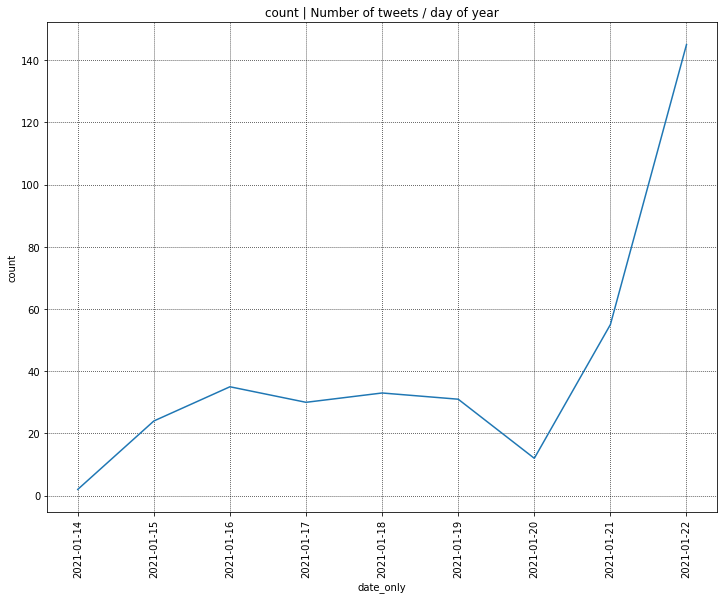

In [40]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

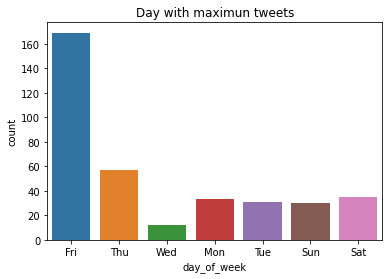

In [41]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day_of_week"] = df["day_of_week"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(df["day_of_week"]);

In [42]:
df.date.min()

Timestamp('2021-01-14 18:35:51')

### User column analysis:

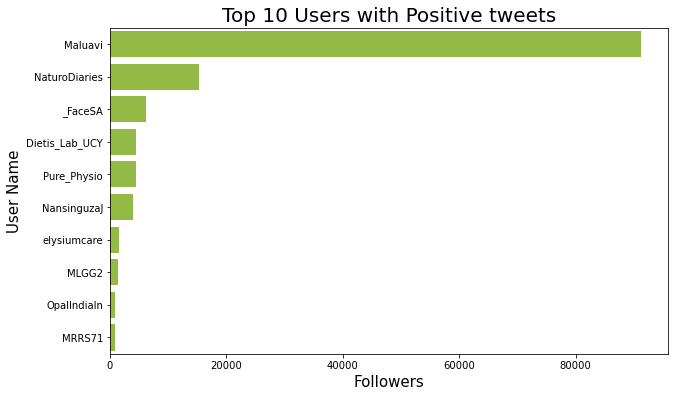

In [43]:
plt.figure(figsize=(10,6))
followers_count = list(df[df['category']=='Positive'].sort_values('user_followers', ascending=False)\
                              .drop_duplicates(subset=['user_name'])[:10].user_followers)
user_name = list(df[df['category']=='Positive'].sort_values('user_followers', ascending=False)\
                        .drop_duplicates(subset=['user_name'])[:10].user_name)
sns.barplot(followers_count, user_name, color='yellowgreen')            
plt.title("Top 10 Users with Positive tweets", fontsize=20)
plt.xlabel("Followers", fontsize=15)
plt.ylabel("User Name", fontsize=15)
plt.show()


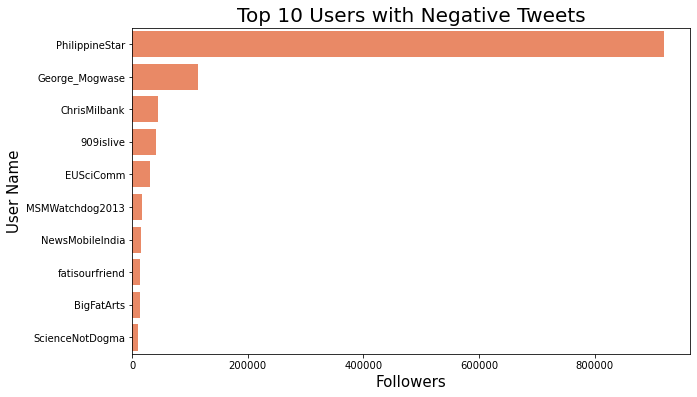

In [44]:
plt.figure(figsize=(10,6))
followers_count = list(df[df['category']=='Negative'].sort_values('user_followers', ascending=False)\
                              .drop_duplicates(subset=['user_name'])[:10].user_followers)
user_name = list(df[df['category']=='Negative'].sort_values('user_followers', ascending=False)\
                        .drop_duplicates(subset=['user_name'])[:10].user_name)
sns.barplot(followers_count, user_name, color='coral')           
plt.title("Top 10 Users with Negative Tweets", fontsize=20)
plt.xlabel("Followers", fontsize=15)
plt.ylabel("User Name", fontsize=15)
plt.show()